<a href="https://colab.research.google.com/github/duvancatan/Time_Series_UdeA/blob/main/3_Amazon_aplicaciones_arima_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

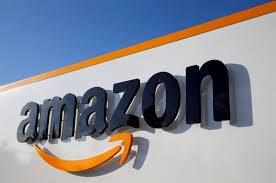

# **PRONÓSTICO DE VENTAS DE AMAZON**
 Los siguientes datos representan las ventas promedio diarias de un artefacto electrónico de Amazon. Se tienen 150 datos disponibles. El gerente de ventas está interesado en conocer cuánto serán las ventas diarias en la próxima semana dada la información disponible.

In [ ]:
# Instalar Librerías #
# Se sugiere cargar previo a la presentación, es demorado #
install.packages("stats")
install.packages("astsa")
install.packages("forecast")
install.packages("tseries")
install.packages("nortest")
install.packages("fBasics")
install.packages("car")
install.packages("MLmetrics")

In [ ]:
# Cargar Librerías #
library(stats)
library(astsa)
library(forecast)
library(tseries)
library(nortest)
library(fBasics)
library(car)
library(MLmetrics)

In [ ]:
# Carga de datos #
sales = c(10.01 ,10.07 ,10.32	,9.75	,10.33 ,10.13	,10.36	,10.32	,10.13	,10.16	,10.58	,10.62	,10.86	,11.2,
          10.74 ,10.56	,10.48	,10.77	,11.33	,10.96	,11.16	,11.7	,11.39	,11.42	,11.94	,11.24	,11.59	,10.96,
          11.4	,11.02	,11.01	,11.23	,11.33	,10.83	,10.84	,11.14	,10.38	,10.9	,11.05	,11.11	,11.01	,11.22,
          11.21 ,11.91	,11.69	,10.93	,10.99	,11.01	,10.84	,10.76	,10.77	,10.88	,10.49	,10.5	,11	,10.98,
          10.61 ,10.48	,10.53	,11.07	,10.61	,10.86	,10.34	,10.78	,10.8	,10.33	,10.44	,10.5	,10.75	,10.4	,10.4,
          10.34 ,10.55	,10.46	,10.82	,10.91	,10.87	,10.67	,11.11	,10.88	,11.28	,11.27	,11.44	,11.52	,12.1,
          11.83 ,12.62, 12.41	,12.43	,12.73	,13.01	,12.74	,12.73	,12.76	,12.92	,12.64	,12.79	,13.05	,12.69,
          13.01 ,12.9	,13.12, 12.47	,12.47 ,12.94	,13.1	,12.91 ,13.39	,13.13	,13.34	,13.34	,13.14	,13.49	,13.87,
          13.39 ,13.59	,13.27, 13.7	,13.2	,13.32	,13.15	,13.3	,12.94	,13.29	,13.26	,13.08	,13.24	,13.31	,13.52,
          13.02 ,13.25	,13.12	,13.26, 13.11	,13.3	,13.06	,13.32	,13.1	,13.27	,13.64	,13.58	,13.87	,13.53	,13.41,
          13.25 ,13.5	,13.58	,13.51	,13.77	,13.4	)

In [ ]:
# Cantidad de Observaciones #
paste("Número de promedios diarios:",length(sales))

In [ ]:
# Gráfica de la Serie de Ventas Mensuales #
plot.ts(sales, main = "Serie de Promedios Diarios ", ylab=""); grid()

## Homogeneidad de Varianzas


## Prueba de Levene
La prueba de Levene evalúa la igualdad de varianzas para diferentes grupos. Si divides tu serie temporal en segmentos, puedes usar esta prueba.

$H_0:$ Las varianzas de los grupos son iguales $\hspace{0.4cm}$ $vs$ $\hspace{0.4cm}$ $H_1:$ Al menos un grupo tiene una varianza diferente


Si el valor p resultante es menor que el nivel de significancia (por ejemplo, 0.05), se rechaza $H_0$, indicando que las varianzas no son homogéneas.

In [ ]:
# División la serie en Ventanas #
segmentos <- cut(1:length(sales), breaks = 10)

# Prueba de Levene
pl = leveneTest(sales ~ segmentos)
print(pl)

## Gráficos de Box-Plot Dinámicos

In [ ]:
# Estructuración de los datos con fechas #
fechas <- seq(as.Date("2024-01-01"), as.Date("2024-05-29"), by = "day")
datos <- data.frame(Fecha = fechas, Valor = sales)

In [ ]:
# Número de días por ventana
tamaño_ventana <- 10

In [ ]:
# Librería necesaria para realizar los Box-Plot #
install.packages("dplyr")
library(dplyr)

In [ ]:
# Crear una columna que indique el número de la ventana
datos <- datos %>%
  mutate(Ventana = ceiling(as.numeric(Fecha - min(Fecha) + 1) / tamaño_ventana))

In [ ]:
library(ggplot2)

In [ ]:
# Crear el boxplot por ventanas
ggplot(datos, aes(x = as.factor(Ventana), y = Valor)) +
  geom_boxplot(fill = "skyblue", color = "darkblue") +
  labs(
    title = "Boxplot por Ventana de Ventas en AMAZON",
    x = "Ventana",
    y = "Sales"
  ) +
  theme_minimal()

## Prueba de Estacionaridad

La prueba de Dickey-Fuller es una prueba de raíz unitaria que se utiliza comúnmente para determinar si una serie de tiempo es estacionaria o no.                                                          
$H_0$ : No Estacionaria $\hspace{0.4cm}$ $vs$  $\hspace{0.4cm}$ $H_a$ : Estacionaria

In [ ]:
# Aplicar la prueba de Dickey-Fuller #
adf.test(sales)

## Funciones de Autocorrelación y Autocorrelación Parcial

In [ ]:
# Gráfica de la ACF y PACF #
par(mfrow=c(2,1))
acf(sales, main="Función de Autocorrelación")
pacf(sales, main="Función de Autocorrelación Parcial", lag.max = 30)

In [ ]:
# Primera diferencia de ventas #
dsales<-diff(sales)
ts.plot(dsales, ylab="", main = "Serie de Ventas Diferenciada"); grid()

In [ ]:
# Gráfica de la ACF y PACF de la serie diferenciada #
par(mfrow=c(2,1))
acf(dsales, lag.max=25, main="ACF de Serie Diferenciada")
pacf(dsales, lag.max=25, main="PACF de Serie Diferenciada")

## Búsqueda y selección del mejor modelo con la función ARIMA

In [ ]:
# Función que busca el mejor modelo según los criterios AIC Y BIC ##
sarima.list = function(datos, p, d = 0, q, P = 0, D = 0, Q = 0, S = NA, include.mean = F, criterio = ""){
  M <- matrix(ncol = 10,nrow = (p+1)*(q+1)*(P+1)*(Q+1),dimnames=list(NULL,c("p","d","q","P","D","Q","S","converge","AIC", "BIC")))
  k <- 1
  n <- length(datos)
  for(i in 0:p){
    for(j in 0:q){
      for(l in 0:P){
        for(m in 0:Q){
          if ((i==0)&&(j==0)&&(l==0)&&(m==0)) next #Continua con la siguiente iteracion
          fit <- arima(datos, order = c(i, d, j),seasonal = list(order = c(l, D, m), period = S), include.mean = include.mean)
          M[k,1]  <- i
          M[k,2]  <- d
          M[k,3]  <- j
          M[k,4]  <- l
          M[k,5]  <- D
          M[k,6]  <- m
          M[k,7]  <- S
          M[k,8]  <- fit$code  # 0: Convergencia, 1: No Convergencia
          M[k,9]  <- AIC(fit)  # AIC
          M[k,10] <- AIC(fit, k = log(length(datos)))  # BIC
          k <- k+1
        }
      }
    }
  }
  if(criterio == "AIC"){
    M <- M[order(M[,9]),]
  }
  if(criterio == "BIC"){
    M <- M[order(M[,10]),]
  }
  if(criterio == ""){
    M <- M
  }
  rownames(M) = rep("", (p+1)*(q+1)*(P+1)*(Q+1))
  return(M[1:((p+1)*(q+1)*(P+1)*(Q+1)-1),])
}

In [ ]:
# Aplicación de la función a la serie original "sales" #
sarima.list(sales, p=3, d=1, q=3, P = 0, D = 0, Q = 0, S = NA, include.mean = F, criterio = "")

## Búsqueda y selección del mejor modelo con la función SARIMA() (No corre en COLAB, correr en R-Studio directamente)

In [ ]:
# Función para calcular todos los criterios para órdenes menores o iguales a los especificados
criterios_para_todos_los_ordenes <- function(serie, max_ordenes, S) {
  # Verificar si el paquete 'astsa' está instalado
  if (!requireNamespace("astsa", quietly = TRUE)) {
    install.packages("astsa")
  }
  library(astsa)

  # Desempaquetar los órdenes máximos
  max_p <- max_ordenes[1]
  max_d <- max_ordenes[2]
  max_q <- max_ordenes[3]
  max_P <- max_ordenes[4]
  max_D <- max_ordenes[5]
  max_Q <- max_ordenes[6]

  # Crear lista para almacenar resultados
  resultados <- data.frame() # Initialize as an empty data frame instead of a list

  # Iterar sobre todas las combinaciones de órdenes
  for (p in 0:max_p) {
    for (d in 0:max_d) {
      for (q in 0:max_q) {
        for (P in 0:max_P) {
          for (D in 0:max_D) {
            for (Q in 0:max_Q) {
              # Intentar ajustar el modelo SARIMA
              modelo <- tryCatch(
                {
                  sarima(serie, p, d, q, P, D, Q, S, details = FALSE)
                },
                error = function(e) NULL  # Manejar errores (por ejemplo, combinaciones no válidas)
              )

              # Si el modelo se ajustó correctamente, guardar los criterios
              if (!is.null(modelo)) {
                # Append a row to the data frame instead of using rbind
                resultados <- rbind(
                  resultados,
                  data.frame(
                    p = p, d = d, q = q, P = P, D = D, Q = Q,
                    AIC = modelo$AIC,
                    AICc = modelo$AICc,
                    BIC = modelo$BIC
                  )
                )
              }
            }
          }
        }
      }
    }
  }
resultados
}

### Vector de órdenes máximos $p, d, q, P, D, Q$

In [ ]:
# Vector de órdenes máximos #
max_ordenes <- c(2, 1, 2, 0, 0, 0)

In [ ]:
# Calcular todos los criterios para los órdenes menores o iguales
criterios_para_todos_los_ordenes(sales, max_ordenes,S=0)

## Estimación de parámetros para un ARIMA(0,1,1)

### Usando la función arima()

In [ ]:
# Estimación ML condicional #
(mod_1 = arima(sales, c(0, 1, 1), method = c("CSS")))
 res_1 = residuals(mod_1)

In [ ]:
# Estimación ML exacta #
(mod_2 = arima(sales, c(0, 1, 1), method = c("ML")))
 res_2 = residuals(mod_2)

In [ ]:
# Estimación ML exacta con valores iniciales dados por la estimación condicional #
(mod_3=arima(sales, c(0, 1, 1), method = c("CSS-ML")))
 res_3=residuals(mod_3)

### Usando la función sarima()

In [ ]:
mod_sar <- sarima(sales, p=0, d=1, q=1)

In [ ]:
names(mod_sar) # Valores del Objeto sarima()

In [ ]:
print(mod_sar$ttable) # Significancia de los parámetros estimados

In [ ]:
mod_sar$fit # Valores Estimados

In [ ]:
mod_sar$ICs # Todos los Criterios de Información

In [ ]:
mod_sar$ICs[1] # Criterio de Información Akaike

In [ ]:
mod_sar$ICs[2] # Criterio de Información Akaike Corregido

In [ ]:
mod_sar$ICs[3] # Criterio de Información de Schwarz Bayesiano

In [ ]:
res_sar <- mod_sar$fit$residuals # Residuales

In [ ]:
hist(res_sar, freq = FALSE, main="Distribución de los residuales")
dens <- density(res_sar)
lines(dens, col = "red", lwd = 2)

## Diagnóstico Residual para el modelo ARIMA(0,1,1)

In [ ]:
# Diagnóstico residual paso a paso #
par(mfrow=c(3,2))
plot.ts(res_sar, main="Residuales", ylab="")
hist(res_sar, main="Histograma de Residuales")
acf(res_sar, lag.max=25, main="ACF de Residuales")
pacf(res_sar, lag.max=25, main="PACF de Residuales")

# La prueba de Ljung-Box se formula para evaluar la autocorrelación de un conjunto de rezagos en los residuos de un modelo ajustado.
# La hipótesis nula (H0) es que no hay autocorrelación en los residuos hasta el rezago especificado, mientras que
# la hipótesis alternativa (H1) es que hay autocorrelación en al menos uno de los rezagos.
Box.Test = function(x, lag = 25, main = "p values for Ljung-Box statistic"){
  B<-vector("numeric")
  for(i in 1:lag){
    B[i]<-Box.test(x, lag = i, type = "Ljung-Box")$p.value
  }
  A<-matrix(cbind(c(1:lag),B), nrow = lag, ncol = 2, byrow=F, dimnames = list(NULL, c("lag", "p.value")))
  plot(A[,1], A[,2], ylim = c(0, max(0.051,(max(A[,2])+.01))),
       ylab = "p-value", xlab = "Lag", main = main, lwd = 2)
  abline(0.05, 0, col = 4, lty = 2)
}
Box.Test(res_sar)

### Algunas metodologías para probar normalidad

In [ ]:
# Shapiro Wilk: Prueba de Hipótesis para contrastar normalidad #
shapiro.test(res_sar)

In [ ]:
# Kolmogorov-Smirnov: Prueba no paramétrica basada en Bondad Ajuste #
lillie.test(res_sar)

In [ ]:
# Jarque Bera: Basado en la Asimetría y Curtosis de una Normal #
jarqueberaTest(res_sar)

In [ ]:
# Gráfico del Q-Q Plot #
qqPlot(res_sar, envelope = 0.95, main = "Q-Q Plot de Residuos con Intervalo")

## Función alternativa para encontrar modelos preliminares

La función auto.arima de la librería forecast de R, proporciona una opción rápida para construir pronósticos con series temporales, debido a que evalúa entre todos los posibles modelos, al mejor modelo considerando diversos criterios: estacionariedad, estacionalidad, diferencias, entre otras.



In [ ]:
# Función Autoarima #
mod_auto = auto.arima(sales)
mod_auto

In [ ]:
# Diagnóstico residual #
res_auto<-auto.arima(sales)$residuals
par(mfrow = c(2,2))
hist(res_auto)
shapiro.test(res_auto)
Box.test(res_auto, type = c("Box-Pierce", "Ljung-Box"))
Box.Test(res_auto)
acf(res_auto, main="ACF de Ventas")
pacf(res_auto, main="PACF de Ventas")

## Pronóstico

In [ ]:
# Modelo a ser empleado en el pronóstico #
mod_sar <- arima(sales, order = c(0, 1, 1), method = c("CSS-ML"))

In [ ]:
# Pronósticos para la serie de ventas con horizonte 30 (1 mes) #
fc_sar = forecast(sales, model = mod_sar, h = 12)
fc_sar

In [ ]:
# Gráfico de la series de ventas con sus respectivos pronósticos #
plot(fc_sar, ylab="Ventas Promedio", xlab="Mes", main="Pronósticos de las Ventas Promedio Mensual")

In [ ]:
# Forma Alternativa #
pred_sar = predict(mod_sar, n.ahead = 12, se.fit = TRUE)
pred_sar

## Desempeño del pronóstico

#### Para medir el desempeño predictivo del modelo, se divide la serie en datos para entrenar (train) y datos para probar (test) el modelo. Tomando un 80% de los datos para ajustar el modelo y un 20% para testearlo, pues se sabe que entre más datos tenga el modelo podemos obtener mejores predicciones.

In [ ]:
r=0.8 # Tasa de entrenamiento
sales_train <- ts(sales[1:floor(r*length(sales))])
sales_test <- ts(sales[(length(sales_train)+1): length(sales)])

In [ ]:
# Pronósticos para la serie de ventas con horizonte 30 (1 mes) #
fc_r = forecast(sales_train, model = mod_sar, h = length(sales_test))

In [ ]:
# MAPE (Error de Porcentaje Medio Absoluto) #
mape_sales = MAPE(ts(fc_r$mean), ts(sales_test))*100
paste('MAPE : ',round(mape_sales,3),"%")

In [ ]:
# Gráfico de las series sales_train, sales_test y fc_r$mean #
plot.ts(sales,  lwd=2, main="Entrenamiento, Prueba y Pronóstico"); grid()
lines(fc_r$mean, col="red", lwd=2)

## Forma alternativa de analizar desempeño por pronóstico

In [ ]:
# Con este comando se pueden ver las métricas para evaluar el pronóntico  ME, RMSE, MAE, MPE, MAPE, MASE #
# ME (Mean Error)
# RMSE (Root Mean Squared Error)
# MAE (Mean Absolute Error)
# MPE (Mean Percentage Error)
# MAPE (Mean Absolute Percentage Error)
# MASE (Mean Absolute Scaled Error)
summary(mod_sar)

## ¡FIN!